# Poisson Process Simulation

## Theory

The code simulates a Poisson process, which is a stochastic process that models the occurrence of random events over time. In a Poisson process:

1. Events occur continuously and independently of each other.
2. The number of events in any time interval follows a Poisson distribution.
3. The average rate of events (λ) remains constant over time.

The key formula for a Poisson process is:

P(N(t) = k) = (λt)^k * e^(-λt) / k!

Where:
- N(t) is the number of events up to time t
- λ is the average rate of events
- k is the number of events
- e is Euler's number

## Code Explanation

The code implements two main functions:

1. `generate_paths_possian(noofpath, noofsteps, T, xiP)`
2. `maincalculator()`

### Function: generate_paths_possian

This function generates multiple paths of a Poisson process.


In [16]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt 

In [20]:
def generate_paths_possian(noofpath,noofsteps,T,xiP):
    X=np.zeros([noofpath,noofsteps+1])
    Xc=np.zeros([noofpath,noofsteps+1])
    time=np.zeros([noofsteps+1])
    dt=T/float(noofsteps)
    Z=np.random.poisson(xiP*dt,[noofpath,noofsteps])
    for i in range(0,noofsteps):
        X[:,i+1]=X[:,i]+Z[:,i]
        Xc[:,i+1] = Xc[:,i] -xiP*dt + Z[:,i]
        time[i+1]=time[i]+dt
    paths={"time":time,'X':X,'Xcom':Xc}
    return paths
    
        


Parameters:
- `noofpath`: Number of paths to generate
- `noofsteps`: Number of time steps
- `T`: Total time
- `xiP`: Rate parameter (λ)

The function:
1. Initializes arrays for the process (X), compensated process (Xc), and time.
2. Generates Poisson-distributed random numbers.
3. Iteratively builds the paths.
4. Returns a dictionary with time, X, and Xc.

### Function: maincalculator

This function sets parameters and visualizes the Poisson process.


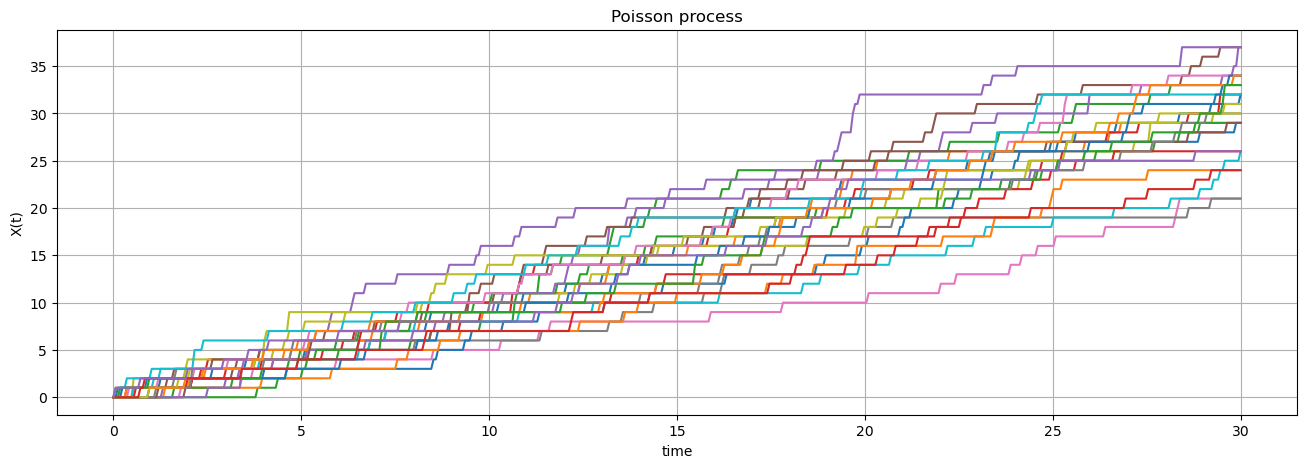

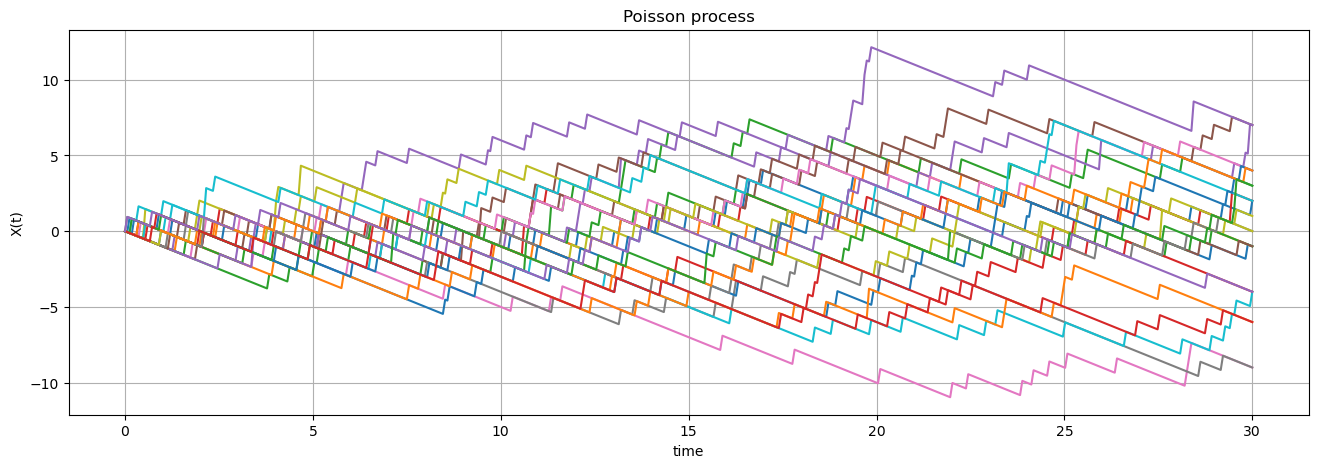

In [25]:
def maincalculator():
    noofpath=25
    noofsteps=500
    T=30
    xiP=1

    Paths=generate_paths_possian(noofpath,noofsteps,T,xiP)
    timeGrid=Paths["time"]
    X = Paths["X"]
    Xc = Paths["Xcom"]
    plt.figure(1,figsize=(16,5))
    plt.title('Poisson process')
    plt.plot(timeGrid,X.T)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")

    plt.figure(2,figsize=(16,5))
    plt.title('Poisson process')
    plt.plot(timeGrid,Xc.T)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
maincalculator()


It:
1. Sets parameters for the simulation.
2. Calls `generate_paths_possian` to create paths.
3. Plots two figures:
   - The Poisson process (X)
   - The compensated Poisson process (Xc)

## Visualization

The code generates two plots:

1. Poisson process: Shows the cumulative number of events over time.
2. Compensated Poisson process: Subtracts the expected number of events (λt) from the Poisson process, resulting in a mean-zero process.

These visualizations help in understanding the random nature of the Poisson process and its properties.

In summary, this code provides a practical implementation and visualization of the Poisson process, demonstrating its key characteristics such as random jumps and the compensated process.